In [1]:
%load_ext autoreload
%autoreload 2

In [43]:
import os

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation
from tsfresh import feature_extraction
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


from drift_ml.datasets.bosch_cnc_machining.utils.dataloader import NPYBoschCNCDataLoader, SimpleTSFreshBoschCNCDataloader
from drift_ml.datasets.bosch_cnc_machining.utils.utils import augment_xyz_samples, extract_tsfresh_features

In [5]:
baseline_loader = SimpleTSFreshBoschCNCDataloader(
    metadata_path="/home/tbiegel/nico_files/bosch_cnc_machining/features_and_data/metadata_ws4096.pkl"
)
baseline_loader.load_data("/home/tbiegel/nico_files/bosch_cnc_machining/features_and_data/all_top_30_features.pkl", 
"/home/tbiegel/nico_files/bosch_cnc_machining/features_and_data/sample_data_y_raw_ws4096.npy")

In [45]:
baseline_loader.generate_datasets_by_size(train_size=.5,val_size=.1,test_size=.4)

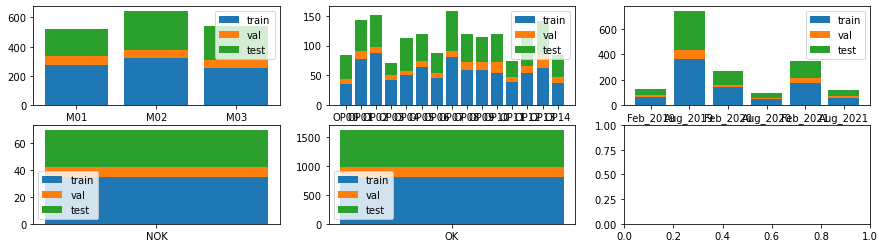

In [46]:
baseline_loader.plot_stats()

In [47]:
X_train = baseline_loader.sample_data_X.iloc[baseline_loader.train_sample_ids]
y_train = baseline_loader.sample_data_y[baseline_loader.train_sample_ids]

X_val = baseline_loader.sample_data_X.iloc[baseline_loader.val_sample_ids]
y_val = baseline_loader.sample_data_y[baseline_loader.val_sample_ids]

X_test = baseline_loader.sample_data_X.iloc[baseline_loader.test_sample_ids]
y_test = baseline_loader.sample_data_y[baseline_loader.test_sample_ids]

In [48]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)

print("Training Set")
print(classification_report(y_train, y_pred_train, target_names=["OK", "NOK"]))
print("Validation Set")
print(classification_report(y_val, y_pred_val, target_names=["OK", "NOK"]))
print("Test Set")
print(classification_report(y_test, y_pred_test, target_names=["OK", "NOK"]))

Training Set
              precision    recall  f1-score   support

          OK       1.00      1.00      1.00     20708
         NOK       1.00      1.00      1.00       647

    accuracy                           1.00     21355
   macro avg       1.00      1.00      1.00     21355
weighted avg       1.00      1.00      1.00     21355

Validation Set
              precision    recall  f1-score   support

          OK       0.99      1.00      0.99      4198
         NOK       1.00      0.64      0.78       156

    accuracy                           0.99      4354
   macro avg       0.99      0.82      0.89      4354
weighted avg       0.99      0.99      0.99      4354

Test Set
              precision    recall  f1-score   support

          OK       0.99      1.00      0.99     16737
         NOK       0.98      0.56      0.72       532

    accuracy                           0.99     17269
   macro avg       0.98      0.78      0.85     17269
weighted avg       0.99      0.99    

In [51]:
augmented_features_basepath = "/home/tbiegel/nico_files/drift_ml/src/drift_ml/datasets/bosch_cnc_machining/raw_data/augmented"
for axis in ["roll"]:#["yaw", "pitch", "roll"]:
    for angle in np.arange(1.0, 13.0, 2.0):
        augmented_features_filename = f"tsfresh_top30_{axis}_shift_{angle}_deg.pkl"
        augmented_features_filepath = os.path.join(augmented_features_basepath, augmented_features_filename)
        
        augmented_loader = SimpleTSFreshBoschCNCDataloader(
            metadata_path="/home/tbiegel/nico_files/bosch_cnc_machining/features_and_data/metadata_ws4096.pkl"
        )
        augmented_loader.load_data(augmented_features_filepath, 
        "/home/tbiegel/nico_files/bosch_cnc_machining/features_and_data/sample_data_y_raw_ws4096.npy")

        print(f"Test set results for {angle} degrees shift in {axis}:")
        X_test = augmented_loader.sample_data_X.iloc[baseline_loader.test_sample_ids]
        y_test = augmented_loader.sample_data_y[baseline_loader.test_sample_ids]
        y_pred_test = model.predict(X_test)
        print(classification_report(y_test, y_pred_test, target_names=["OK", "NOK"]))

Test set results for 1.0 degrees shift in roll:
              precision    recall  f1-score   support

          OK       0.99      1.00      0.99     16737
         NOK       0.95      0.58      0.72       532

    accuracy                           0.99     17269
   macro avg       0.97      0.79      0.86     17269
weighted avg       0.99      0.99      0.98     17269

Test set results for 3.0 degrees shift in roll:
              precision    recall  f1-score   support

          OK       0.99      1.00      0.99     16737
         NOK       0.95      0.56      0.70       532

    accuracy                           0.99     17269
   macro avg       0.97      0.78      0.85     17269
weighted avg       0.98      0.99      0.98     17269

Test set results for 5.0 degrees shift in roll:
              precision    recall  f1-score   support

          OK       0.97      1.00      0.98     16737
         NOK       0.00      0.00      0.00       532

    accuracy                          

/home/tbiegel/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tbiegel/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tbiegel/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tbiegel/anaconda3/lib/

              precision    recall  f1-score   support

          OK       0.97      1.00      0.98     16737
         NOK       0.00      0.00      0.00       532

    accuracy                           0.97     17269
   macro avg       0.48      0.50      0.49     17269
weighted avg       0.94      0.97      0.95     17269

Test set results for 9.0 degrees shift in roll:
              precision    recall  f1-score   support

          OK       0.98      1.00      0.99     16737
         NOK       0.97      0.49      0.65       532

    accuracy                           0.98     17269
   macro avg       0.98      0.74      0.82     17269
weighted avg       0.98      0.98      0.98     17269

Test set results for 11.0 degrees shift in roll:
              precision    recall  f1-score   support

          OK       0.98      1.00      0.99     16737
         NOK       0.99      0.44      0.61       532

    accuracy                           0.98     17269
   macro avg       0.98      0.